In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [10]:
concrete= pd.read_excel("Downloads/Concrete_Data.xls")

In [13]:
concrete.head(7)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299


In [20]:
concrete.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [24]:
X= concrete.drop('Concrete compressive strength(MPa, megapascals) ',axis=1)

In [61]:
X_featurenames=X.columns

In [26]:
X.head(7)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365


In [28]:
Y= concrete['Concrete compressive strength(MPa, megapascals) ']

In [39]:
Y.describe

<bound method NDFrame.describe of 0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64>

In [40]:
X_test,X_train,y_test,y_train= train_test_split(X,Y,test_size=0.2,random_state=44)

In [50]:
type(X_test)

pandas.core.frame.DataFrame

In [56]:
model=RandomForestRegressor(max_depth=30,random_state=1,n_estimators=1000)

In [57]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, n_estimators=1000, random_state=1)

<AxesSubplot:>

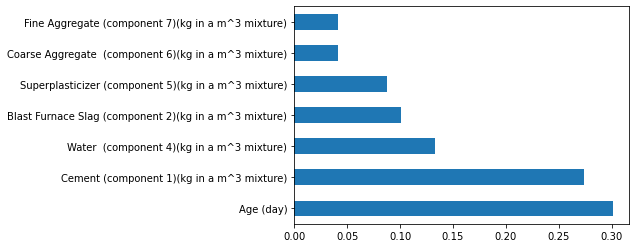

In [64]:
feat_importances = pd.Series(model.feature_importances_, index = X_featurenames)
feat_importances.nlargest(7).plot(kind = 'barh')

     |████████████████████████████████| 356 kB 3.5 MB/s eta 0:00:01
  Created wheel for shap: filename=shap-0.39.0-cp38-cp38-macosx_10_9_x86_64.whl size=416107 sha256=dabfd08be7a4dc956158d5a60deacab5d8096f0396b9440bbfb483f8ba9f8a3a
  Stored in directory: /Users/speedy316/Library/Caches/pip/wheels/3d/c9/06/734ed80d6d61fad331974bf62017b4ea6b33488082b9f5e67e
Successfully built shap


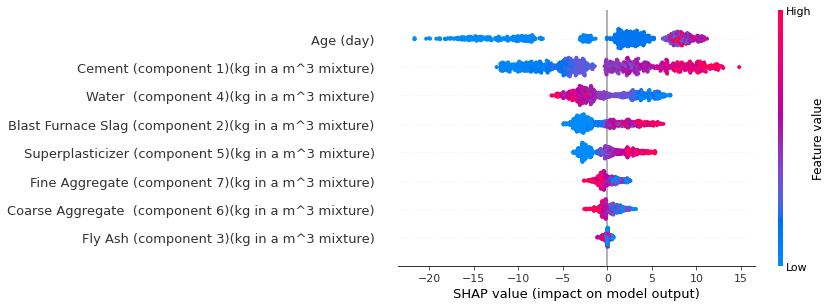

In [67]:
!pip install shap
import shap
ex = shap.TreeExplainer(model)
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

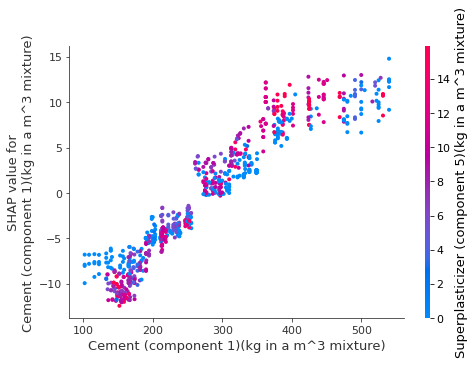

In [69]:
shap.dependence_plot("Cement (component 1)(kg in a m^3 mixture)", shap_values, X_test)

In [70]:
shap.initjs()
ex = shap.KernelExplainer(model.predict, X_train)
shap_values = ex.shap_values(X_test.iloc[0,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0,:])

Using 206 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
